In [1]:
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

In [3]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [4]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [5]:
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.17 | lr:3.0787746743952645e-05, weight decay:1.6553138833625015e-08
val acc:0.12 | lr:0.0002933049012211234, weight decay:1.6997848273026553e-07
val acc:0.1 | lr:2.015093526178242e-06, weight decay:3.869167139112428e-06
val acc:0.44 | lr:0.0017365868487709227, weight decay:6.96297736494278e-08
val acc:0.15 | lr:3.7783307688606385e-06, weight decay:4.3359150347060045e-07
val acc:0.07 | lr:1.9251474135215545e-06, weight decay:5.197886767626283e-07
val acc:0.15 | lr:0.00019501305484842315, weight decay:7.59529191485942e-07
val acc:0.35 | lr:0.001783832843693565, weight decay:2.2052309874176044e-05
val acc:0.1 | lr:4.225638505005108e-06, weight decay:9.959086029900413e-07
val acc:0.1 | lr:0.00019653369416265055, weight decay:4.962768199919932e-07
val acc:0.08 | lr:2.9852098788738516e-06, weight decay:1.2521239144379198e-05
val acc:0.62 | lr:0.004343769191337237, weight decay:2.7000472316171682e-08
val acc:0.13 | lr:0.00021448313645807142, weight decay:9.957109511794936e-08
val ac

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.77) | lr:0.009579051960085823, weight decay:1.5361115944222397e-06
Best-2(val acc:0.74) | lr:0.006916968070995909, weight decay:2.021657770316957e-06
Best-3(val acc:0.73) | lr:0.005838871333024528, weight decay:6.645671649833129e-05
Best-4(val acc:0.7) | lr:0.007270488418248154, weight decay:2.439835898657881e-08
Best-5(val acc:0.63) | lr:0.004605059883975069, weight decay:5.739365080550171e-07
Best-6(val acc:0.62) | lr:0.004343769191337237, weight decay:2.7000472316171682e-08
Best-7(val acc:0.61) | lr:0.004379178477320257, weight decay:3.6778684276584994e-07
Best-8(val acc:0.55) | lr:0.0037260123626021604, weight decay:2.47690260001364e-07
Best-9(val acc:0.46) | lr:0.004043807287392416, weight decay:1.993538974063459e-08
Best-10(val acc:0.46) | lr:0.001939319042135038, weight decay:1.2397276697577553e-08
Best-11(val acc:0.44) | lr:0.0017365868487709227, weight decay:6.96297736494278e-08
Best-12(val acc:0.43) 

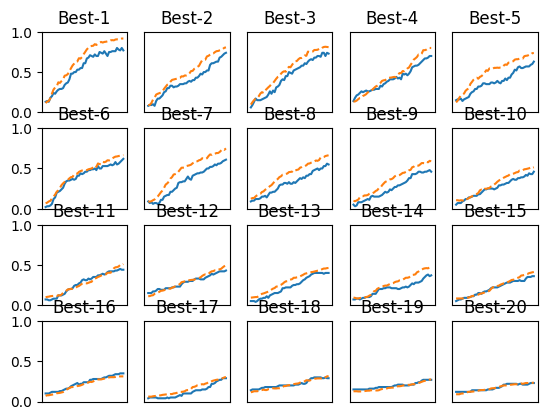

In [6]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()